# 02 - Exploratory Data Analysis 📊

## Problem

How can we generate short descriptions including a list of popular beer styles from brewery reviews with natural language processing (NLP)? 

NOTE: This is similar to how Google Maps provides short blurbs for businesses such as “From scratch, Northern Italian dining.” 

For example, "Spacious warehouse brewery with daily food trucks. Allows dogs. Features IPAs, Hazy IPAs, and high-gravity stouts."

## Notebook Objectives

* Understand the importance of performing EDA on data science projects. 
* Apply data wrangling techniques, as laid out in the DSM building data profiles, tables, and figures to evaluate the feature relationships.
* Identify the features that are likely to have the most impact in modeling based on relationships between the features and the response variable.

In [70]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import time

# Load NLP model
nlp = spacy.load("en_core_web_sm")

%matplotlib inline

In [3]:
# Set default plot size
plt.rcParams['figure.figsize'] = (15, 10)

In [4]:
# Create DataFrame from DB data
db = sqlite3.connect('../data/processed/brewery_reviews.db')
query = """
    SELECT r.text as review_text, r.rating, r.date, b.name as brewery_name, b.street, c.name as city
    FROM reviews r
    JOIN brewery b
    ON r.ba_brewery_id = b.ba_brewery_id
    JOIN cities c
    ON c.id = b.city_id
"""
df = pd.read_sql_query(query, db, parse_dates=['date'])

In [6]:
# Review DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45417 entries, 0 to 45416
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_text   45417 non-null  object        
 1   rating        45417 non-null  float64       
 2   date          45417 non-null  datetime64[ns]
 3   brewery_name  45417 non-null  object        
 4   street        45417 non-null  object        
 5   city          45417 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.1+ MB


In [5]:
# Inspect
df.head()

,review_text,rating,date,brewery_name,street,city
0,Got to visit the newest brewery in Birmingham ...,4.13,2019-07-25,Birmingham District Brewing,"2201 2nd Ave S, Ste 102",Birmingham
1,"Nice big space, very clean, and friendly staff...",4.04,2018-10-23,Trimtab Brewing Company,2721 5th Ave S,Birmingham
2,The vibe of trim tab is interesting.....they h...,4.04,2018-08-24,Trimtab Brewing Company,2721 5th Ave S,Birmingham
3,"Stopped here late one night before closing, th...",4.07,2017-07-11,Trimtab Brewing Company,2721 5th Ave S,Birmingham
4,Extremely relaxed brewery. Great service with ...,4.10,2018-01-21,Trimtab Brewing Company,2721 5th Ave S,Birmingham


In [10]:
# Unique cities
df['city'].unique()

array(['Birmingham', 'Anchorage', 'Phoenix', 'Los Angeles', 'San Diego',
       'San Francisco', 'Boulder', 'Denver', 'Fort Collins', 'Hartford',
       'Wilmington', 'Washington', 'Jacksonville', 'Orlando', 'Tampa',
       'Atlanta', 'Honolulu', 'Chicago', 'Indianapolis', 'Des Moines',
       'New Orleans', 'Portland', 'Baltimore', 'Boston', 'Detroit',
       'Grand Rapids', 'Minneapolis', 'Kansas City', 'Saint Louis',
       'Omaha', 'Las Vegas', 'Portsmouth', 'Albuquerque', 'Buffalo',
       'New York City (NYC)', 'Rochester', 'Asheville', 'Charlotte',
       'Greensboro', 'Raleigh', 'Cincinnati', 'Cleveland', 'Columbus',
       'Bend', 'Eugene', 'Philadelphia', 'Pittsburgh', 'Providence',
       'Charleston', 'Nashville', 'Austin', 'Dallas', 'Houston',
       'San Antonio', 'Salt Lake City', 'Burlington', 'Alexandria',
       'Richmond', 'Seattle', 'Madison', 'Milwaukee', 'Melbourne',
       'Sydney', 'Antwerpen', 'Brugge', 'Brussels', 'Gent', 'Calgary',
       'Edmonton', 'Montréa

In [11]:
# Unique Breweries
len(df['brewery_name'].unique())

4522

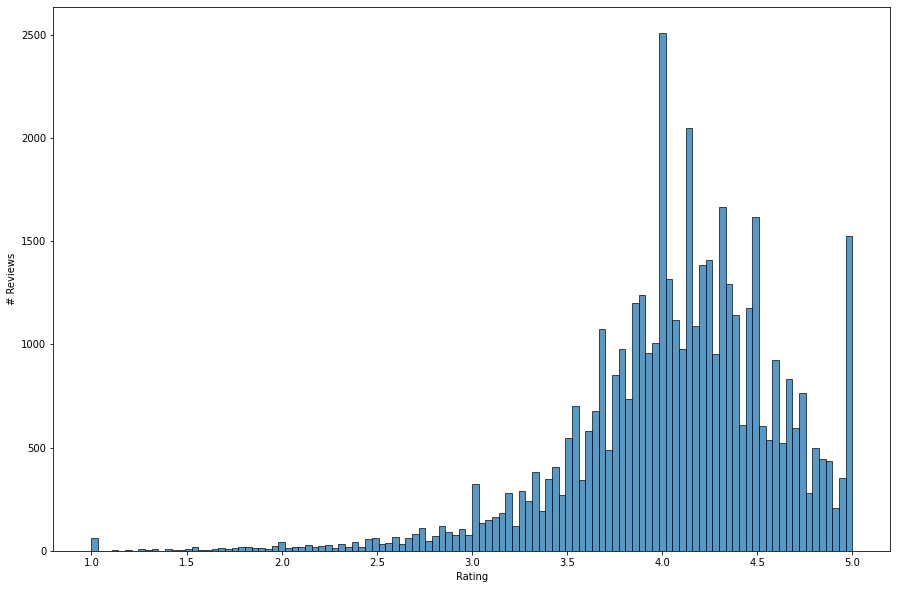

In [7]:
sns.histplot(data=df, x='rating')
plt.xlabel('Rating')
plt.ylabel('# Reviews')
plt.show()

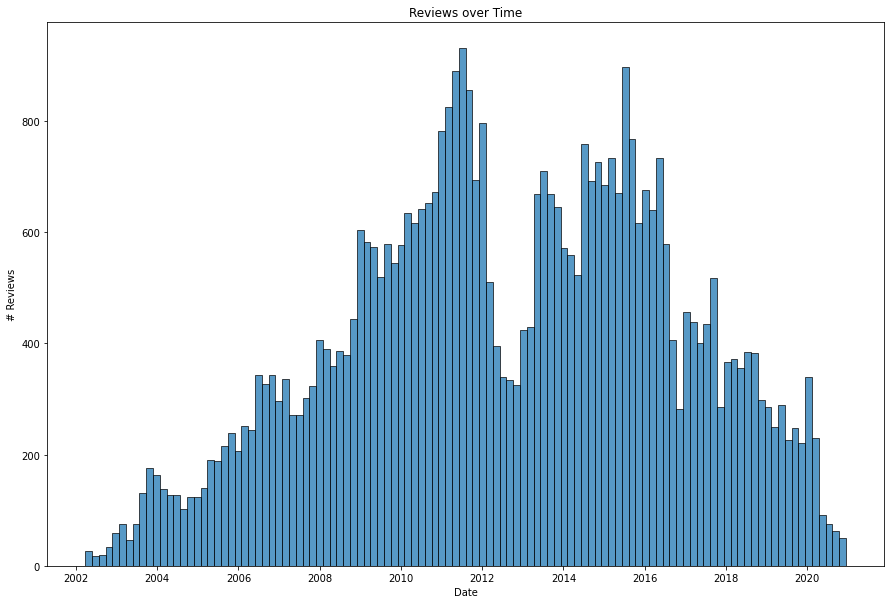

In [89]:
sns.histplot(data=df, x='date', bins=int(225/2))
plt.xlabel('Date')
plt.ylabel('# Reviews')
plt.title('Reviews over Time')
plt.show()

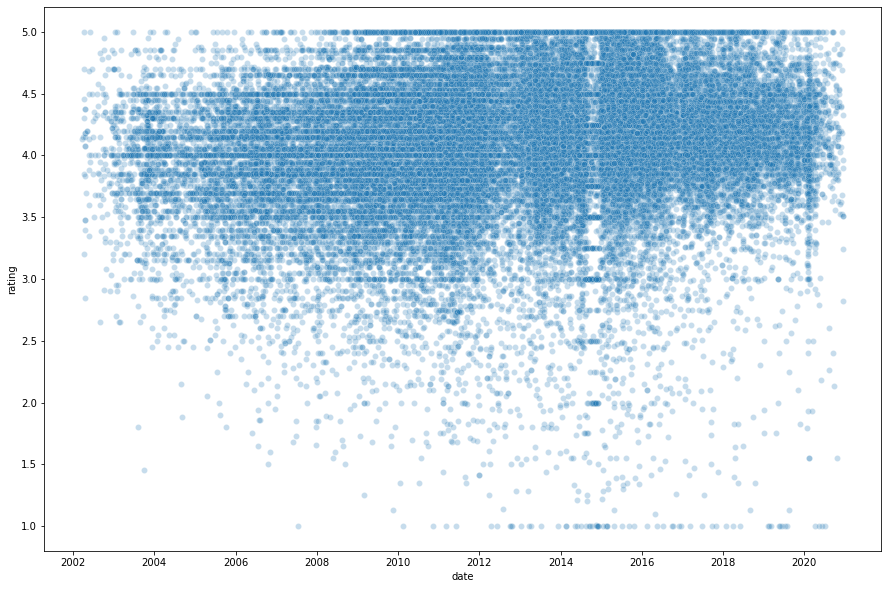

In [9]:
sns.scatterplot(x='date', y='rating', data=df, alpha=0.25)
plt.show()

In [14]:
date_range_month = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='M')
date_range_month

DatetimeIndex(['2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30',
               '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31',
               '2002-11-30', '2002-12-31',
               ...
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', length=225, freq='M')

In [17]:
# Count the words
# WARNING: THIS TAKES A LONG TIME (~8 minutes)
start_time = time.time()
df['tokens'] = df['review_text'].apply(lambda x: len(nlp(x)))
print("--- %s seconds ---" % (time.time() - start_time))

--- 497.2428390979767 seconds ---


In [18]:
# Count the sentences
# WARNING: THIS TAKES A LONG TIME (~9 minutes)
start_time = time.time()
df['sents'] = df['review_text'].apply(lambda x: len(list(nlp(x).sents)))
print("--- %s seconds ---" % (time.time() - start_time))

--- 542.9641661643982 seconds ---


In [24]:
# Save as CSV
df.to_csv('../data/processed/brewery_reviews.csv')

In [100]:
df_reviews = pd.read_csv('../data/processed/brewery_reviews.csv', parse_dates=['date'], index_col=0)
df_reviews.describe()

,rating,tokens,sents
count,45417.000000,45417.000000,45417.000000
mean,4.070979,66.543871,4.282625
std,0.549795,63.605313,3.890732
min,1.000000,0.000000,0.000000
25%,3.800000,18.000000,1.000000
50%,4.130000,52.000000,4.000000
75%,4.430000,98.000000,6.000000
max,5.000000,811.000000,40.000000


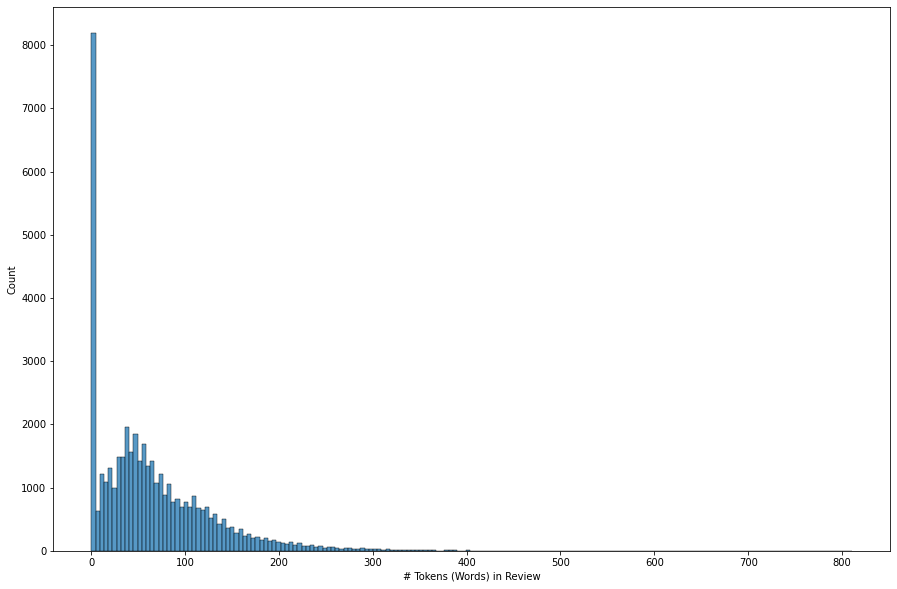

In [101]:
sns.histplot(data=df_reviews, x='tokens')
plt.xlabel('# Tokens (Words) in Review')
plt.ylabel('Count')
plt.show()

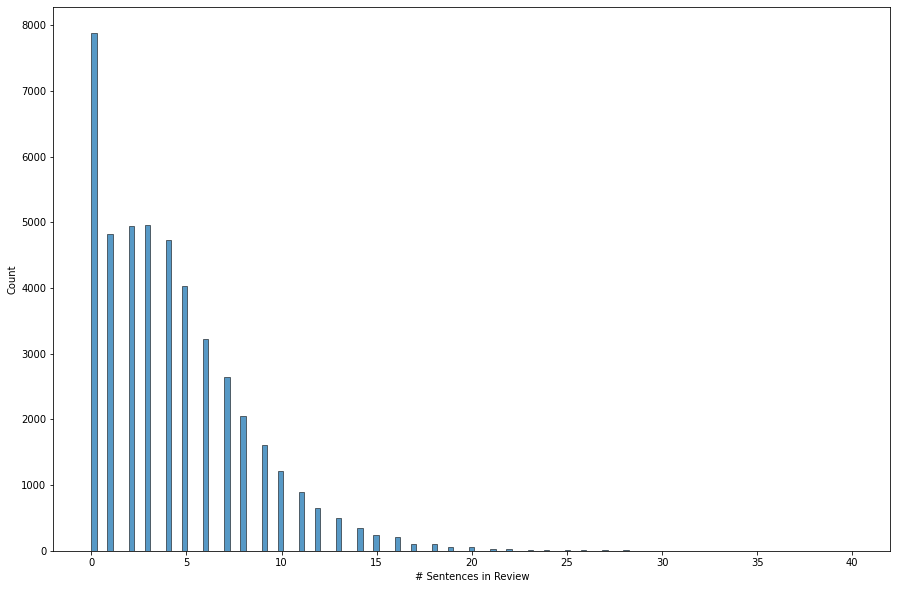

In [102]:
sns.histplot(data=df_reviews, x='sents')
plt.xlabel('# Sentences in Review')
plt.ylabel('Count')
plt.show()

In [104]:
# What percent is wordless review
len(df_reviews[df_reviews['review_text'].isnull()]) / len(df_reviews)

0.17356936829821432

In [105]:
# Number of tokens
df_reviews['tokens'].sum()

3022223

In [74]:
# Stop words (because spaCy is returning ~100k ???)
STOP_WORDS = set(
    """
    a about above across after afterwards again against all almost alone along
    already also although always am among amongst amount an and another any anyhow
    anyone anything anyway anywhere are around as at
    back be became because become becomes becoming been before beforehand behind
    being below beside besides between beyond both bottom but by
    call can cannot ca could
    did do does doing done down due during
    each eight either eleven else elsewhere empty enough even ever every
    everyone everything everywhere except
    few fifteen fifty first five for former formerly forty four from front full
    further
    get give go
    had has have he hence her here hereafter hereby herein hereupon hers herself
    him himself his how however hundred
    i if in indeed into is it its itself
    keep
    last latter latterly least less
    just
    made make many may me meanwhile might mine more moreover most mostly move much
    must my myself
    name namely neither never nevertheless next nine no nobody none noone nor not
    nothing now nowhere
    of off often on once one only onto or other others otherwise our ours ourselves
    out over own
    part per perhaps please put
    quite
    rather re really regarding
    same say see seem seemed seeming seems serious several she should show side
    since six sixty so some somehow someone something sometime sometimes somewhere
    still such
    take ten than that the their them themselves then thence there thereafter
    thereby therefore therein thereupon these they third this those though three
    through throughout thru thus to together too top toward towards twelve twenty
    two
    under until up unless upon us used using
    various very very via was we well were what whatever when whence whenever where
    whereafter whereas whereby wherein whereupon wherever whether which while
    whither who whoever whole whom whose why will with within without would
    yet you your yours yourself yourselves
    """.split()
)

In [109]:
# Word Frequency
from collections import Counter
word_freq = Counter()

for row in df['review_text']:
    words = []
    for word in row.split():
        if word.lower() in STOP_WORDS: continue
        words.append(word) 
    word_freq.update(words)

In [113]:
word_freq.most_common(15)

[('beer', 20701),
 ('place', 17051),
 ('good', 11265),
 ('beers', 11089),
 ('selection', 10831),
 ('bar', 9405),
 ('great', 8848),
 ('food', 6849),
 ('like', 6816),
 ('nice', 6005),
 ('pretty', 5154),
 ('time', 4384),
 ('little', 4314),
 ('tap', 4187),
 ('area', 3693)]